HW4
1e
Floor of sqrt(128) is 11
Thus of the 122 features, we need to select exactly 11, 11 with the highest CV = s/m as calculated in the previous question

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

CV = pd.read_csv('Train_Predictor_CV.csv',index_col=0)
print(CV)

   population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0    2.241105         0.3558      1.428885      0.330213        1.3591   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0     1.612091     0.369083     0.291315      0.50031    0.412776  ...   

   PolicAveOTWorked  LandArea   PopDens  PctUsePubTrans  PolicCars  \
0          0.316718  1.645408  0.864499         1.39711   0.552212   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0       0.773547             0.118531              0.38323   

   LemasPctOfficDrugUn  PolicBudgPerPop  
0             2.552946         0.321977  

[1 rows x 122 columns]


In [37]:
CV_sorted = CV.sort_values(by=0,axis=1,ascending=False)
print(CV_sorted)

   NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0   4.292923       3.470952  3.058964  2.926635             2.552946   

   NumUnderPov  population  numbUrban  HousVacant  LandArea  ...  \
0     2.342443    2.241105   2.038461    1.968467  1.645408  ...   

   LemasSwFTPerPop  PolicPerPop  PctHousOccup  LemasSwFTFieldPerPop  \
0         0.288433     0.288399      0.268182              0.245248   

   PolicReqPerOffic  NumKindsDrugsSeiz  RacialMatchCommPol  PctPolicWhite  \
0          0.228205           0.148149            0.141669       0.123214   

   LemasPctPolicOnPatr  LemasSwFTFieldOps  
0             0.118531           0.064009  

[1 rows x 122 columns]


In [38]:
CV_final = CV_sorted.iloc[0,0:11]
print(CV_final)

NumStreet              4.292923
NumInShelters          3.470952
NumIlleg               3.058964
NumImmig               2.926635
LemasPctOfficDrugUn    2.552946
NumUnderPov            2.342443
population             2.241105
numbUrban              2.038461
HousVacant             1.968467
LandArea               1.645408
racePctHisp            1.612091
Name: 0, dtype: float64


The 11 features with the maximum CV are as thus

In [39]:
feature_header = CV_sorted.columns[0:11]
print(feature_header)

Index(['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig',
       'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban',
       'HousVacant', 'LandArea', 'racePctHisp'],
      dtype='object')


In [40]:
df = pd.read_csv('Final_Imputed_Whole.csv',index_col=0)
print(df)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

In [41]:
train = df.iloc[0:1495,:]
print(train)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

In [42]:
header = feature_header.tolist()
print(header)

['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


In [43]:
header.append('ViolentCrimesPerPop')
print(header)

['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp', 'ViolentCrimesPerPop']


In [44]:
final_train = train[header]
print(final_train)

      NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0          0.00           0.04      0.04      0.03                 0.32   
1          0.00           0.00      0.00      0.01                 0.00   
2          0.00           0.00      0.01      0.00                 0.00   
3          0.00           0.00      0.03      0.02                 0.00   
4          0.00           0.00      0.00      0.00                 0.00   
...         ...            ...       ...       ...                  ...   
1490       0.00           0.00      0.00      0.01                 0.00   
1491       0.03           0.09      0.04      0.15                 0.61   
1492       0.00           0.00      0.03      0.00                 0.00   
1493       0.00           0.00      0.00      0.01                 0.00   
1494       0.00           0.00      0.04      0.15                 0.51   

      NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  \
0            0.08   

Final Train contains the training set corresponding to selected features, including the output

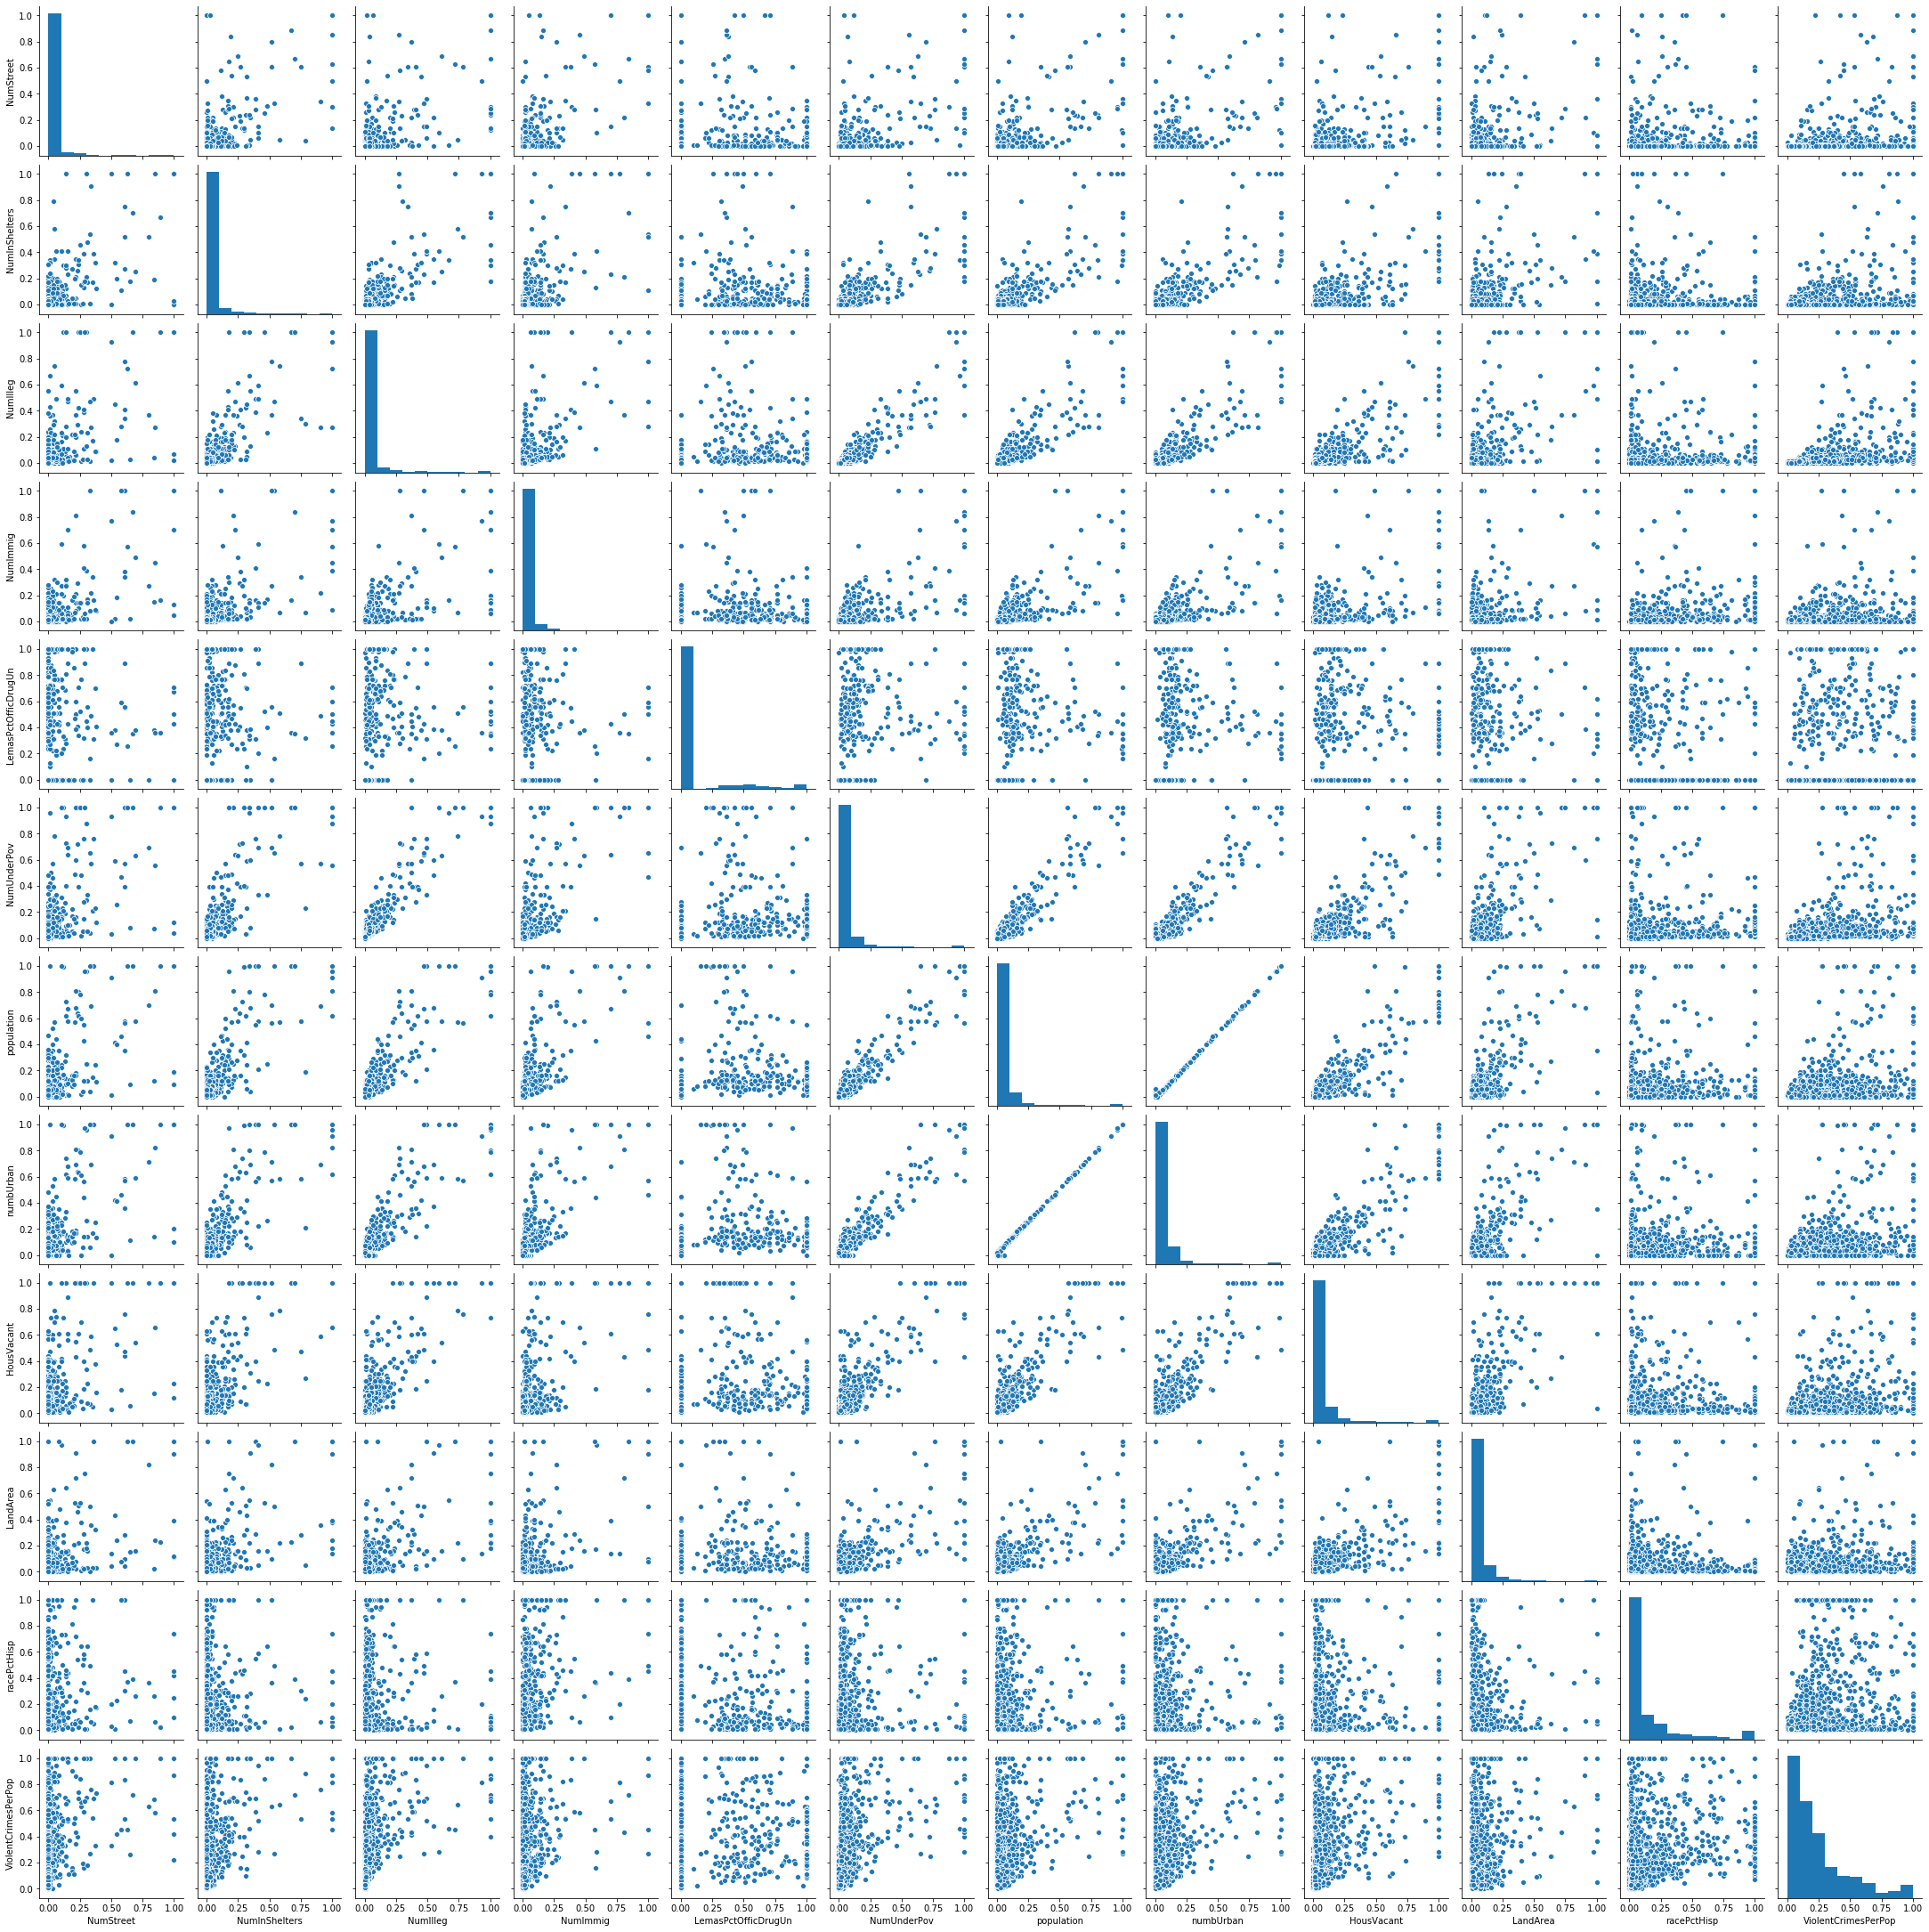

In [45]:
sns.pairplot(final_train)

We have the 12 x 12 scatterplot matrix above

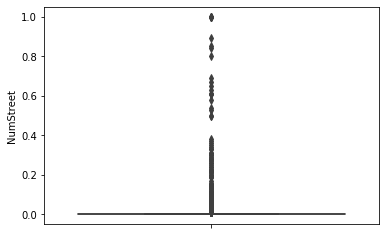

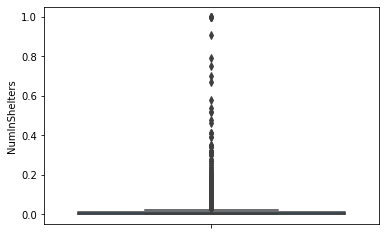

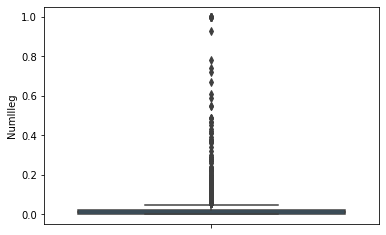

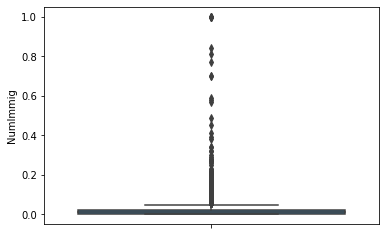

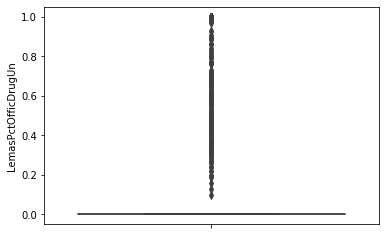

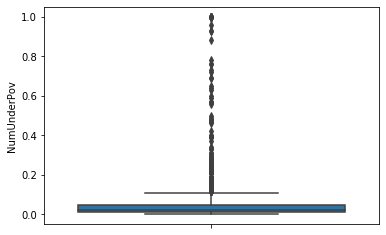

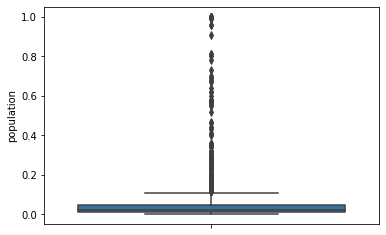

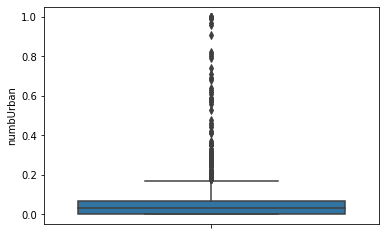

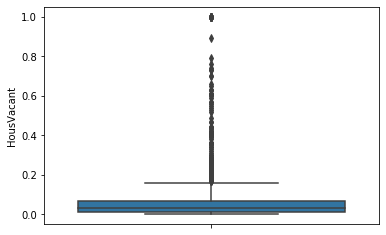

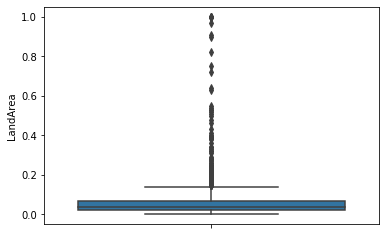

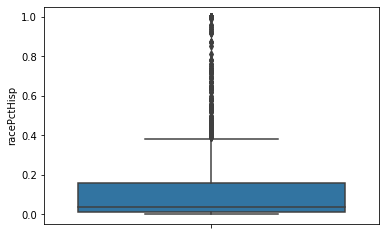

In [46]:
for i in np.arange(0,11):
    sns.boxplot(data=final_train,y=header[i])
    plt.show()

The above plots show the box plots

Conclusions:

From the scatter plot matrix, we have:
CV = sd/mean

Standard deviation represents, on average, the deviation of sample data from the mean (absolutely). The scaled ratio thus represents how much, per unit mean of the sample, the sample skews, on average, from its mean.

Larger CV represents that over the entire range of the sample, the data has quite a bit of variation. Assuming that the output is also varied, larger CV features correspond to being able to much more accurately distinguish different outputs.

Thus, considering a fixed variability in output, larger variability of features over this outcome corresponds to a clear seperation of outcome points with respect to those inputs.

Looking to scatter plots we see that over the entire range of our features, the output is varied. Thus features and output are variable. As such the density of samples is skewed towards the left plane, closer to 0, due to multiple reasons, including but not limited to normalization of data.

Since this ratio is even smaller for other features, we may expect their scatterplots to be even more 'compressed', meaning that for a small region of their variation, the output covers its entire range, thus reducing to a certain extent the distinguishing strength of the features.

While the current selected features aren't absolutely the most distinguishingly precise, they surely seem to be as good as we can get for this dataset.

Also, we do get a 'decent' linearity, as the points lie densely on one half of the positive x-y plane. Again for features with smaller CV, the overall plane 'fill' of the sample will be larger, and thus, the relative strength of features to correspond to an appropriate output even smaller